<a href="https://colab.research.google.com/github/GitTyan/DeepLearning/blob/master/10_%E5%9F%BA%E6%9C%AC/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# python3.6　バージョン確認
import sys
print(sys.version)
# TF2.xの読み込み
import tensorflow as tf
# バージョンの確認
print('TensorFlow version: {}'.format(tf.__version__))

3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
TensorFlow version: 2.4.1


=====テストデータ=====
(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
=====1.モデルの構築=====
=====2.モデルのコンパイル=====
=====3.モデルの学習=====
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 4.3932 - accuracy: 0.8161
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3467 - accuracy: 0.9264
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2067 - accuracy: 0.9464
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1620 - accuracy: 0.9576
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9600
=====4.モデルの評価=====
313/313 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9522
=====5.モデルの保存(シリアル化)=====
INFO:tensorflow:Assets written to: Sequential_model/assets
=====モデルの読み込み====
=====グラフの可視化=====


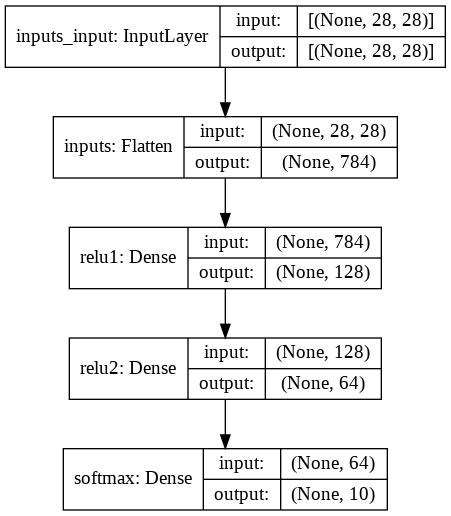

In [11]:
# ==============================
# Sequential API (初心者向き)
# ==============================
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("=====テストデータ=====")
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)

print("=====1.モデルの構築=====")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='inputs'),
  tf.keras.layers.Dense(128, activation='relu', name='relu1'),
  tf.keras.layers.Dense(64, activation='relu', name='relu2'),
  tf.keras.layers.Dense(10, activation='softmax', name='softmax')
], name='Sequential')
print("=====2.モデルのコンパイル=====")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("=====3.モデルの学習=====")
history = model.fit(x_train, y_train, epochs=5, batch_size=32)
print("=====4.モデルの評価=====")
model.evaluate(x_test,  y_test, verbose=1)
print("=====5.モデルの保存(シリアル化)=====")
model.save('Sequential_model')
print("=====モデルの読み込み====")
model_load = tf.keras.models.load_model('Sequential_model')
print("=====グラフの可視化=====")
tf.keras.utils.plot_model(model, to_file='Sequetial.png', show_shapes=True)

=====テストデータ=====
(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
=====1.モデルの構築=====
=====2.モデルのコンパイル=====
=====3.モデルの学習=====
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.6718 - accuracy: 0.8145
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4246 - accuracy: 0.9005
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3866 - accuracy: 0.9142
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3599 - accuracy: 0.9182
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3147 - accuracy: 0.9291
=====4.モデルの評価=====
313/313 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.9237
=====5.モデルの保存(シリアル化)=====
INFO:tensorflow:Assets written to: Functional_model/assets
=====グラフの可視化=====


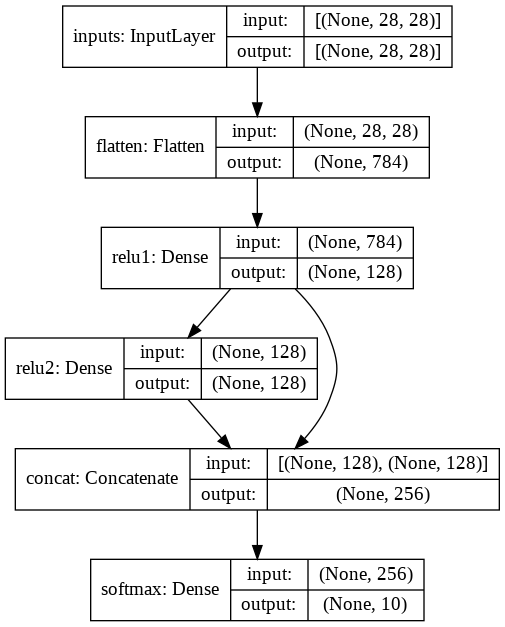

In [12]:
# ==============================
# Functional API (中初級者向き)
# ==============================
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("=====テストデータ=====")
print(x_train.shape)
print(y_train)
print(x_test.shape)
print(y_test)
print("=====1.モデルの構築=====")
inputs   = tf.keras.layers.Input(shape=(28, 28), name='inputs')
flatten  = tf.keras.layers.Flatten(name='flatten')(inputs)
hidden1   = tf.keras.layers.Dense(128, activation='relu', name='relu1')(flatten)
hidden2   = tf.keras.layers.Dense(128, activation='relu', name='relu2')(hidden1)
concat   = tf.keras.layers.Concatenate(name='concat')([hidden1, hidden2])
outputs  = tf.keras.layers.Dense(10, activation='softmax', name='softmax')(concat)
model    = tf.keras.models.Model(inputs=inputs, outputs=outputs, name='functional')
print("=====2.モデルのコンパイル=====")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print("=====3.モデルの学習=====")
history = model.fit(x_train, y_train, epochs=5, batch_size=32)
print("=====4.モデルの評価=====")
model.evaluate(x_test,  y_test, verbose=1)
print("=====5.モデルの保存(シリアル化)=====")
model.save('Functional_model')
print("=====グラフの可視化=====")
tf.keras.utils.plot_model(model, to_file='Functional.png', show_shapes=True)